# Emerging Technolgoies

### Libraries 

In [16]:
# Random selections.
import random

# Numerical arrays.
import numpy as np

# Quantum.
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator


## Problem 1: Generating Random Boolean Functions

This problem models deutsh algorithm without actuall implementing it. It is a classical representation of the underlying mechanisms to implement deutch's algorithm. Iy is a basis to understand how its quantumn counter part acts, but in classical form 

**Deutsh algorithm** - 
the purpose of the deutsh algorihtm is to decide which catgeory the input function belongs to: *constant or balanced*, based only on the output, without knowing the input function. It is essentially a black box paradox. (https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa).

This process essentially involves querying the black box with  inputs to uncover the selected random function.
In order to test this algorihtm you need to query the algorithmn with both 0 and 1 to verify the type of function used.

**The Deutsch-Jozsa algorithm**
The main different between the deutsh algrotihm and the deutsh-Joza algorithm is that is a slight improvement from the former, requiring only one input query to test the state instead (balanced or constant) instead of of 2. (https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa)

### Constant and balanced function 

 **Deterministic operations** - each of the four functions that will be chosen by random are of a dtermerministric state, thsi means that each classical state is transformed into a function - these are the following tyoes 
 
 *Example taking in only one argument as input*
**f1(a)** = a constant function, always outputs 0 regardless of input. If the function takes in 0 as its input, 0 will be the output. If the function takes in 1 as the input, the output will also be 0.
 
**f2(a)** = a balanced identify function which always returns its input as the output. If the function takes in 0 as its input, 0 will be the output. If the function takes in 1 as its input, the output will be 1 (hence the name of an identity function as it always returns the input)
  
**f3(a)** = a balanced function that always returns the opposite of it input. If this function recieves 0 as its input, it ouputs 1. If this function recieves 1 as its input, it outputs 0.
  
**f4(a)**= a constant function, always outputs 1 regardless of     input. If this function recieves 0 as its input its ouput is 1. If thsi function recieves 1 as its input, its output is 1.

| a | f₁(a) | f₂(a) | f₃(a) | f₄(a) |
|---|-------|-------|-------|-------|
| 0 | 0     | 0     | 1     | 1     |
| 1 | 0     | 1     | 0     | 1     |

### Define the four constant and balanced functions 

In [17]:
def random_function(num_inputs):
    """Returns a random constant or balanced list of length 2**n."""
    # 2**n is the number of possible input combinations for n bits (2^4 = 16 for 4 bits).
    size = 2**num_inputs 
    # chooses randomly between 'constant' and 'balanced' function types.
    function_type = random.choice(['constant', 'balanced'])
    
    # Consatnt function
    # Ouput will always be 0 or 1 regardless of the input.
    # Example 1 output of this function : ('Constant: ', [0, 0, 0, 0, 0, 0, 0, 0])
    # Example 2 ouput of thsi function : ('Constant: ', [1, 1, 1, 1, 1, 1, 1, 1, 1])
    if function_type == 'constant':
        # All same value
        return [random.choice([0, 1])] * size
    
    # Balanced function 
    # Will have an equal number of 0's and 1's, but in a random order.
    # Output will be the opposite of the input.
    # Example 1 output of this function : ('Balanced: ', [1, 0, 1, 0, 1, 0, 1, 0])
    # Example 2 output of this function : ('Balanced: ', [0, 0, 0, 0, 1, 1, 1, 1])
    else:
        # Half 0's, half 1's shuffled
        output = [0] * (size // 2) + [1] * (size // 2)
        random.shuffle(output)
        return output

### Define the possible amount of input combinations 
The total number of possible combination is 

$n^2$

There are $2^n$ possible bitstrings to check, and in the worst case, you would need to test $2^{n/2 + 1}$ of these.

In [18]:
print("possible number fo input combinations for n bits :")
inputs = 4
possible_length = 2**inputs 
print(possible_length)

output = [0] * (possible_length // 2) + [1] * (possible_length // 2)
print(f"output before shuffle :{output}")

random.shuffle(output)
print(f"output after shuffle :{output}")


possible number fo input combinations for n bits :
16
output before shuffle :[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
output after shuffle :[0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1]


In [19]:
def random_constant_balanced():
    """Randomly returns a constant or balanced function taking 4 Boolean arguments."""
    # Generate random output using random_output
    output = random_function(4)
    
    def function(a, b, c, d):
        # Convert binary args to index
        index = a + 2*b + 4*c + 8*d
        return output[index]
    
    return function


### fclosure method 

This function returns another function and is instansiated inside the parent function. Its purporse is to hide as much information as possible about the rnadoom function selected.

In [20]:
def function_closure(n):
    """Return a function that uses an object in the enclosing function."""
    # Get a random function that takes n arguments
    random_function = random_constant_balanced()
    # Define a function that takes n binary arguments and applies them to f_a
    # Querying the hidden function with inputs and getting the output.
    # Variadic  fucntion - a function that can accept a variable number of arguments
    def query(*args):
        if len(args) != n:
            return None
        else:
            # Returns a function that takes 4 arguments and applies them to f_a
            return random_function(*args)
    # Return the closure
    return query 


## Problem 2: Classical Testing for Function Type


In [21]:
def determine_constant_balanced(random_function):
    # List to store the results of the function for each input.
    results = []

    # All 16 possible inputs for the function. 
    inputs = [(a, b, c, d) for a in [0, 1] for b in [0, 1] for c in [0, 1] for d in [0, 1]]

    for input in inputs:
        # For each input, call the random function.
        output = random_function(*input)
        # Store the output of the result in the resuls list.
        results.append(output)

        # Count the number of 0s in the results list.
        zeros = results.count(0)
        # Count the number of 1s in the results list.
        ones = results.count(1)

        # Balanced if there are both 0s and 1s in the results list.
        if ones > 0 and zeros > 0:
            return ("Balanced: ", results)

        # With only 16 possible inputs if there are more than 8 1s or 0s then the function is constant.
        if ones > 8 or zeros > 8:
            return ("Constant: ", results)


In [22]:
# Get a random function using the closure.
function = function_closure(4)

# Determine if the function is constant or balanced.
test = determine_constant_balanced(function)

# Print the result 
print(test)

# function = random_constant_balanced()
# # Determine if the function is constant or balanced.
# test = determine_constant_balanced(function)
# test

('Constant: ', [1, 1, 1, 1, 1, 1, 1, 1, 1])


### Efficiency of solution

My solution is efficient as it does not loop through all 16 possible inputs to reach a conclusion on whether the function is constant or balanced. A list is defined to store all outputs and the function loops through each input combination and calls the random function on each iteration. The number of 1s and 0s in the output are stored and each round checks the state of the function.

If there are both 0s and 1s in the list of outputs, that is enough to return the function is balanced so there can be as little as two iterations. Through this implementation, all 16 possible inputs are not required to be checked. 



### What is the maximum number of times you need to call f to be 100% certain whether it is balanced?

A function accepting 4 arguments as inputs can only have 16 possible inputs - 8 constant inputs and 8 balanced inputs 

- **The 16 possible inputs**

    (0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1),
    (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1), (1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)

`Balanced Functions` : A function that returns 0 exactly half of the time and exactly 1 have of the time.

**Minimum**

With a function that accepts 4 argumnets as input the minimum number of times it would need to call the function to determine if it is balanced is 2. If the first time the random function returns 0 and the second time it returns 1, this is enough to classify the function as balanced as a constant function will only ever return 1 or only ever return 0.

- `Example 1`

    - *fucntion call 1 : ouput = 0*
    - *fucntion call 2 : ouput = 1*


**Maximum**

The maximum number of times you would need to call f to determine if it is balanced is 9. With 16 possible input combinations, the function can return all 0s for the first 8 ouputs and on the ninth, return 1. This indicates it is balanced. 

- `Example 2`

    - *fucntion call 1 : ouput = 0*
    - *fucntion call 2 : ouput = 0*
    - *fucntion call 3 : ouput = 0*
    - *fucntion call 4 : ouput = 0*
    - *fucntion call 5 : ouput = 0*
    - *fucntion call 6 : ouput = 0*
    - *fucntion call 7 : ouput = 0*
    - *fucntion call 8 : ouput = 0*
    - *fucntion call 9 : ouput = 1*


The max number of times you need to call f to be 100% certain it is balanced is `9`.


### What is the maximum number of times you need to call f to be 100% certain whether it is constant?

`Constant Functions` : A function always either return 1 or always either returns 0.

**Minimum and Maximum**

With a function that accepts 4 argumnets as input, both the minimum and maximum number of calls it would take to determine if f is a constant function is also `9`. With 16 different input combinations if a function is called 8 times and all the inputs yield 0, without the 9th combination it cannot yet be determined if the function is constant ro balanced. On the 9th function call, if it were to return 0 again, it is constant as more than half of the inputs returned 1.


- `Example`

    - *fucntion call 1 : ouput = 0*
    - *fucntion call 2 : ouput = 0*
    - *fucntion call 3 : ouput = 0*
    - *fucntion call 4 : ouput = 0*
    - *fucntion call 5 : ouput = 0*
    - *fucntion call 6 : ouput = 0*
    - *fucntion call 7 : ouput = 0*
    - *fucntion call 8 : ouput = 0*
    - *fucntion call 9 : ouput = 0*


The max number of times you need to call f to be 100% certain it is consatnt is `9`.


## Problem 3: Quantum Oracles
This is a quantum problem, Problem 1 and 2 were classical. This now uses the oracles used in the seutsch algrithm.

An oracle is a black box - it computes f(x) in one quatum query 

- Oracle = abstract mathematical object

- Circuit = concrete implementation of that oracle

Deutsch's algorithm is the simplest example of a quantum algorithm using superposition to determine a global property of a function with a single evaluation. In the single-input case, there are four possible Boolean functions. Using Qiskit, create the appropriate quantum oracles for each of the possible single-Boolean-input functions used in Deutsch's algorithm. Demonstrate their use and explain how each oracle implements its corresponding function.


In [23]:
def deutsch_oracle(case: int) -> QuantumCircuit:
    if case not in [1, 2, 3, 4]:
        raise ValueError("case must be 1, 2, 3, or 4.")

    oracle = QuantumCircuit(2)

    # f(x) = 0  
    if case == 1:
        oracle.x(0)

    # f(x) = 1  
    elif case == 2:
        oracle.x(1)

    # f(x) = x  
    elif case == 3:
        oracle.cx(0, 1)

    # f(x) = not x
    elif case == 4:
        oracle.x(1)
        oracle.cx(0, 1)

    return oracle

Case 1: f(x) = 0 (constant)


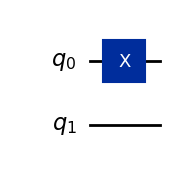

Case 2: f(x) = 1 (constant)


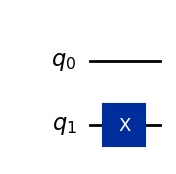

Case 3: f(x) = x (balanced)


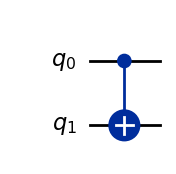

Case 4: f(x) = not x (balanced)


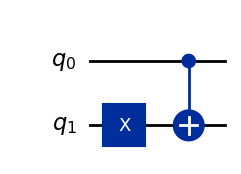

In [24]:
labels = {
    1: "f(x) = 0 (constant)",
    2: "f(x) = 1 (constant)",
    3: "f(x) = x (balanced)",
    4: "f(x) = not x (balanced)",
}

for case, label in labels.items():
    print(f"Case {case}: {label}")
    circuit = deutsch_oracle(case)
    display(circuit.draw(output="mpl"))

## Problem 4: Deutsch's Algorithm with Qiskit


## Problem 5: Scaling to the Deutsch–Jozsa Algorithm
